In [41]:
import pandas as pd
import pickle
import seaborn as sns
%matplotlib inline

In [32]:
datapath = '/home/zafrin/PycharmProjects/RateMyProfessor/data'
# prof_raw = pd.read_json(datpath+'/professors_play.json')
prof_raw = pd.read_pickle(datapath+'/pickle/prof.pickle')
processed = pd.read_pickle(datapath+'/processed/tsdf_pandas.pickle')

In [6]:
prof_raw.columns

Index(['id', 'review_count', 'dept', 'overall_quality', 'level_of_difficulity',
       'hotness', 'take_again', 'name', 'school', 'schoolid', 'city', 'state',
       'accessible outside class', 'amazing lectures', 'beware of pop quizzes',
       'caring', 'clear grading criteria', 'extra credit', 'get ready to read',
       'gives good feedback', 'graded by few things', 'group projects',
       'hilarious', 'inspirational', 'lecture heavy', 'lots of homework',
       'participation matters', 'respected', 'skip class? you won't pass.',
       'so many papers', 'test heavy', 'tough grader', 'prof_id', 'sex'],
      dtype='object')

In [33]:
prof_raw.shape

(5978, 34)

In [34]:
processed.columns

Index(['prof_id', 'comment_length', 'tac', 'ts'], dtype='object')

In [35]:
processed.shape

(5975, 4)

In [36]:
prof_raw.set_index('id', inplace=True)
processed.set_index('prof_id', inplace=True)

In [37]:
prof = pd.concat([prof_raw,processed], axis=1, join='inner')

In [38]:
prof.shape

(5978, 37)

In [16]:
prof.columns

Index(['id', 'review_count', 'dept', 'overall_quality', 'level_of_difficulity',
       'hotness', 'take_again', 'name', 'school', 'schoolid', 'city', 'state',
       'accessible outside class', 'amazing lectures', 'beware of pop quizzes',
       'caring', 'clear grading criteria', 'extra credit', 'get ready to read',
       'gives good feedback', 'graded by few things', 'group projects',
       'hilarious', 'inspirational', 'lecture heavy', 'lots of homework',
       'participation matters', 'respected', 'skip class? you won't pass.',
       'so many papers', 'test heavy', 'tough grader', 'prof_id', 'sex',
       'prof_id', 'comment_length', 'tac', 'ts'],
      dtype='object')

In [44]:
del prof_raw
del processed

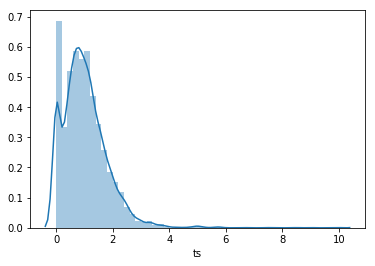

In [42]:
sns.distplot(prof.ts)

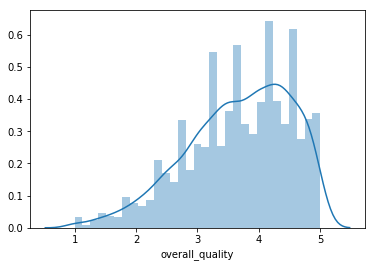

In [43]:
sns.distplot(prof.overall_quality)

In [45]:
prof.ts.describe()

count    5978.000000
mean        1.023399
std         0.791481
min         0.000000
25%         0.500000
50%         0.916667
75%         1.426794
max        10.000000
Name: ts, dtype: float64

In [46]:
prof.overall_quality.describe()

count    5978.000000
mean        3.668116
std         0.853434
min         1.000000
25%         3.100000
50%         3.800000
75%         4.300000
max         5.000000
Name: overall_quality, dtype: float64

In [64]:
prof[prof.ts>5].ts.count()

14

In [58]:
prof[prof.ts>4].ts.count()/prof.ts.count()*100

0.5185680829708933

In [71]:
prof.ts = prof.ts.apply(lambda x: 5 if x>5 else x)

In [72]:
prof[prof.ts>5].ts

Series([], Name: ts, dtype: float64)

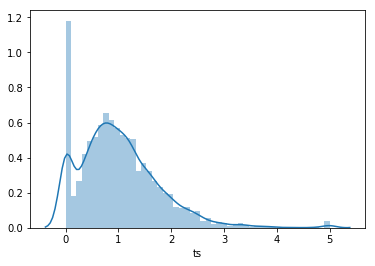

In [73]:
sns.distplot(prof.ts)

In [130]:
df = prof[prof.review_count>36]
df[df.ts==0].ts.count()

0

In [131]:
df.shape

(1647, 37)

In [132]:
df.ts.describe()

count    1647.000000
mean        1.160884
std         0.535903
min         0.095238
25%         0.763191
50%         1.081081
75%         1.486014
max         3.404040
Name: ts, dtype: float64

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
x = df[['ts']]

scaler = MinMaxScaler(feature_range=(1, 5))

x_scaled = scaler.fit_transform(x)

In [135]:
x['scaled_ts'] = x_scaled

/home/zafrin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [136]:
x.describe()

,ts,scaled_ts
count,1647.000000,1647.000000
mean,1.160884,2.288256
std,0.535903,0.647851
min,0.095238,1.000000
25%,0.763191,1.807486
50%,1.081081,2.191782
75%,1.486014,2.681304
max,3.404040,5.000000


In [137]:
x.head()

,ts,scaled_ts
100001,0.500000,1.489315
100006,1.472973,2.665539
100013,0.762500,1.806651
100020,0.722222,1.757959
100043,0.957317,2.042164


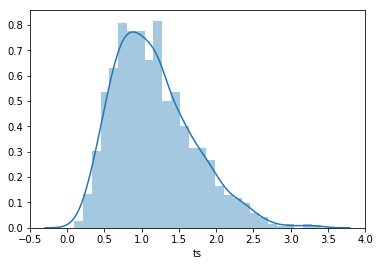

In [138]:
sns.distplot(x.ts)

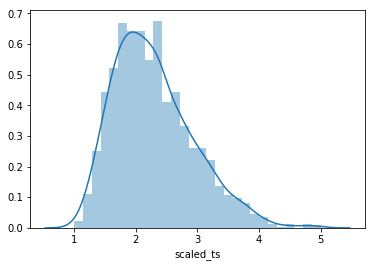

In [139]:
sns.distplot(x.scaled_ts)

In [159]:
prof = pd.concat([df,x], axis=1, join='inner')

In [160]:
prof.columns

Index(['review_count', 'dept', 'overall_quality', 'level_of_difficulity',
       'hotness', 'take_again', 'name', 'school', 'schoolid', 'city', 'state',
       'accessible outside class', 'amazing lectures', 'beware of pop quizzes',
       'caring', 'clear grading criteria', 'extra credit', 'get ready to read',
       'gives good feedback', 'graded by few things', 'group projects',
       'hilarious', 'inspirational', 'lecture heavy', 'lots of homework',
       'participation matters', 'respected', 'skip class? you won't pass.',
       'so many papers', 'test heavy', 'tough grader', 'prof_id', 'sex',
       'comment_length', 'tac', 'ts', 'id', 'ts', 'scaled_ts'],
      dtype='object')

In [158]:
prof.dropna()

In [161]:
prof.shape

(1647, 39)

In [162]:
prof.scaled_ts.max()

5.0

In [165]:
high_value_prof = prof[prof.scaled_ts >3]

In [167]:
high_value_prof.shape

(243, 39)

In [181]:
qualities = ['review_count', 'overall_quality', 'level_of_difficulity',
       'hotness', 'take_again',
       'accessible outside class', 'amazing lectures', 'beware of pop quizzes',
       'caring', 'clear grading criteria', 'extra credit', 'get ready to read',
       'gives good feedback', 'graded by few things', 'group projects',
       'hilarious', 'inspirational', 'lecture heavy', 'lots of homework',
       'participation matters', 'respected', 'skip class? you won\'t pass.',
       'so many papers', 'test heavy', 'tough grader',
       'comment_length']

In [168]:
high_value_prof.describe()

,review_count,overall_quality,level_of_difficulity,schoolid,accessible outside class,amazing lectures,beware of pop quizzes,caring,clear grading criteria,extra credit,...,test heavy,tough grader,prof_id,sex,comment_length,tac,ts,id,ts,scaled_ts
count,243.000000,243.000000,243.000000,243.000000,85.000000,123.000000,32.000000,158.000000,125.000000,72.000000,...,70.000000,138.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,71.119342,3.992181,2.922222,1796.518519,1.882353,2.764228,2.125000,3.031646,2.552000,2.555556,...,1.814286,3.384058,105720.139918,0.641975,215.240019,0.529669,2.111018,105720.139918,2.111018,3.436869
std,39.498381,0.636608,0.717376,2067.476716,1.475287,2.084609,1.431219,2.230138,1.824811,2.047939,...,1.343722,2.202595,3016.649431,0.480409,28.283330,0.120014,0.321928,3016.649431,0.321928,0.389177
min,37.000000,2.200000,1.100000,45.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100179.000000,0.000000,131.756098,0.351351,1.750000,100179.000000,1.750000,3.000436
25%,45.000000,3.600000,2.400000,826.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,103292.000000,0.000000,196.961538,0.441269,1.867636,103292.000000,1.867636,3.142646
50%,58.000000,4.100000,2.900000,1413.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,105962.000000,1.000000,215.409091,0.500000,2.025000,105962.000000,2.025000,3.332883
75%,81.000000,4.500000,3.400000,1894.000000,2.000000,4.000000,2.250000,4.000000,3.000000,4.000000,...,2.000000,5.000000,108351.000000,1.000000,235.808649,0.589744,2.301163,108351.000000,2.301163,3.666735
max,341.000000,5.000000,4.700000,14621.000000,9.000000,9.000000,6.000000,9.000000,9.000000,8.000000,...,8.000000,9.000000,110900.000000,1.000000,287.960000,0.983871,3.404040,110900.000000,3.404040,5.000000


In [182]:
high_value_prof[qualities].mean().sort_values(ascending=False)

comment_length                 215.240019
review_count                    71.119342
overall_quality                  3.992181
skip class? you won't pass.      3.549383
tough grader                     3.384058
respected                        3.037500
caring                           3.031646
hilarious                        2.982456
lots of homework                 2.944444
level_of_difficulity             2.922222
amazing lectures                 2.764228
gives good feedback              2.702381
get ready to read                2.659341
inspirational                    2.610169
participation matters            2.609756
extra credit                     2.555556
clear grading criteria           2.552000
group projects                   2.266667
beware of pop quizzes            2.125000
lecture heavy                    2.009259
accessible outside class         1.882353
test heavy                       1.814286
graded by few things             1.660000
so many papers                   1

In [177]:
high_value_prof.sex.value_counts()/high_value_prof.sex.count()

1.0    0.641975
0.0    0.358025
Name: sex, dtype: float64

In [178]:
prof.sex.value_counts()/prof.sex.count()

1.0    0.641773
0.0    0.358227
Name: sex, dtype: float64

In [183]:
low_value_prof = prof[prof.scaled_ts >2]

In [184]:
low_value_prof.shape

(1022, 39)

In [185]:
low_value_prof[qualities].mean().sort_values(ascending=False)

comment_length                 208.692445
review_count                    73.653620
overall_quality                  3.731213
tough grader                     3.227124
skip class? you won't pass.      3.151067
get ready to read                3.000000
level_of_difficulity             2.987573
respected                        2.903339
caring                           2.826248
lots of homework                 2.756264
hilarious                        2.733173
amazing lectures                 2.702586
clear grading criteria           2.617063
gives good feedback              2.601351
lecture heavy                    2.577963
participation matters            2.509202
extra credit                     2.477032
inspirational                    2.392202
test heavy                       2.211679
beware of pop quizzes            2.123077
group projects                   2.000000
graded by few things             1.873563
accessible outside class         1.861842
so many papers                   1

In [186]:
low_value_prof.head()

,review_count,dept,overall_quality,level_of_difficulity,hotness,take_again,name,school,schoolid,city,...,test heavy,tough grader,prof_id,sex,comment_length,tac,ts,id,ts,scaled_ts
100006,37,Business,3.1,3.6,cold-chili,40%,Danny Ervin,Salisbury University,871,Salisbury,...,2.0,1.0,100006,1.0,183.405405,0.432432,1.472973,100006,1.472973,2.665539
100043,82,Psychology,3.6,2.5,cold-chili,N/A,Dennis Sobol,Oakland Community College - Orchard Ridge,1377,Farmington Hills,...,NaN,NaN,100043,1.0,180.451220,0.268293,0.957317,100043,0.957317,2.042164
100075,40,Humanities,3.3,3.8,cold-chili,N/A,Mark Golden,University of Winnipeg,1494,Winnipeg,...,NaN,1.0,100075,1.0,201.575000,0.225000,0.975000,100075,0.975000,2.063541
100089,44,Mathematics,3.1,3.2,cold-chili,83%,Shanty Elias,Mount Royal University,1570,Calgary,...,NaN,NaN,100089,0.0,195.909091,0.545455,1.454545,100089,1.454545,2.643262
100100,71,Business,3.1,3.6,cold-chili,N/A,Duncan Cameron,Concordia University,1422,Montreal,...,NaN,NaN,100100,1.0,174.211268,0.492958,1.316901,100100,1.316901,2.476865


In [189]:
x = pd.DataFrame([[1,{'q1':3, 'q2':2}],
              [4,{'q1':3, 'q3':2}]], columns=['id', 'qualities'])

In [190]:
x

,id,qualities
0,1,"{'q1': 3, 'q2': 2}"
1,4,"{'q1': 3, 'q3': 2}"


In [191]:
x2 = x['qualities'].apply(pd.Series)

In [192]:
x2

,q1,q2,q3
0,3.0,2.0,NaN
1,3.0,NaN,2.0


In [195]:
x3 = pd.concat([x,x2], axis=1).drop('qualities', axis=1)

In [196]:
x3

,id,q1,q2,q3
0,1,3.0,2.0,NaN
1,4,3.0,NaN,2.0
